# **QSTP FINAL PROJECT - DEEP LEARNING**


---


## Topic: Computer Vision
> ### Problem Statement: 
>> Train an image classification model of your choice (eg. CNNs such as ResNets) on the labeled part of the dataset in a supervised way and report results on the test set. Use transfer learning and make a comparison on the test accuracy by freezing the weights of a model pre-trained on Imagenet and fine-tuning the entire network. Use the STL-10 dataset.


## **Project Overview:** 
> ### *Models chosen:* 
>> #### 1. Purely Supervised Learning: 
>>> A Convolutional Neural Network consisting of 2 Convolutions, 2 Max-pooling layers and 1 Fully Connected layer.

**Accuracy obtained: 54.84%**

>> #### 2. Using Transfer Learning:
>>> A pre-trained model from imagenet (mobilenet_v2) was used by freezing its weights and fine-tuning it to achieve the desired result. 

**Accuracy obtained: 87.57%**

︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎
> ### *Graphical Comparision:*
>> #### 1. Comparing the Loss functions of the two models:
>>> 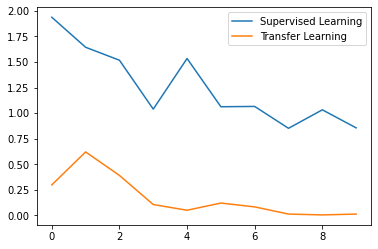

>> #### 2. Comparing the accuracy of the two models: 
>>> 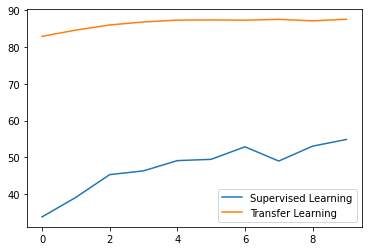


## **1. Using Supervised Learning:**

In [1]:
# Pre-requisite imports
import torch
import torch.nn as nn
from torch.autograd import Variable 
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torchvision
import numpy as np


# Importing train and test dataset
train_data = dsets.STL10('./data', split='train', transform=transforms.ToTensor(), download=True)
test_data = dsets.STL10('./data', split='test', transform=transforms.ToTensor(), download=True)

# Defining number of epochs 
batch_size = 25
n_iters = 2000
num_epochs = int(n_iters/(len(train_data)/batch_size))

# Making the train and test dataset iterable
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = batch_size, shuffle = False)

# Defining out CNN Model Class
class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel, self).__init__()

    #Convolution-1
    self.cnn1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=9, stride=1,padding=4)
    self.relu1 = nn.ReLU()

    #Max Pool-1
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)

    #Convolution-2
    self.cnn2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=9, stride=1,padding=4)
    self.relu2 = nn.ReLU()

    #Max Pool-2
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)

    #Fully Connected
    self.fc1 = nn.Linear(64*24*24, 10)

  def forward(self, x):
    out = self.cnn1(x)
    out = self.relu1(out)
    out = self.maxpool1(out)
    out = self.cnn2(out)
    out = self.relu2(out)
    out = self.maxpool2(out)
    out = out.view(out.size(0), -1) 
    out = self.fc1(out)

    return out

# Initialising Model Class
model = CNNModel()

# Initialising Loss Class
criterion = nn.CrossEntropyLoss()

learning_rate = 0.01

# Initialising Optimiser Class
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_values_SL = []
accuracy_values_SL = []


# Training the model and testing after every epoch 
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = Variable(images)
    labels = Variable(labels)
    optimiser.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimiser.step()

  correct = 0
  total = 0
  for images, labels in test_loader:
    images = Variable(images)
    labels = Variable(labels)
    outputs = model(images)
    predicted = torch.argmax(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted==labels).sum()
    
  accuracy = 100 * correct/total
  loss_values_SL.append(loss.data) # Adding loss values after every epoch in a list
  accuracy_values_SL.append(accuracy) # Adding accuracy values after every epoch in a list 
  print('Epoch: {}, Loss: {}, Accuracy: {}'.format(epoch+1, loss.data, accuracy))

  0%|          | 0/2640397119 [00:00<?, ?it/s]

Extracting ./data/stl10_binary.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 1, Loss: 1.9371408224105835, Accuracy: 33.76250076293945
Epoch: 2, Loss: 1.6436114311218262, Accuracy: 39.087501525878906
Epoch: 3, Loss: 1.516942024230957, Accuracy: 45.275001525878906
Epoch: 4, Loss: 1.0389546155929565, Accuracy: 46.29999923706055
Epoch: 5, Loss: 1.5335115194320679, Accuracy: 49.087501525878906
Epoch: 6, Loss: 1.0622143745422363, Accuracy: 49.4375
Epoch: 7, Loss: 1.0650238990783691, Accuracy: 52.849998474121094
Epoch: 8, Loss: 0.8512665629386902, Accuracy: 48.974998474121094
Epoch: 9, Loss: 1.032025933265686, Accuracy: 53.025001525878906
Epoch: 10, Loss: 0.855602502822876, Accuracy: 54.837501525878906


## **2. Using Transfer Learning:**

In [2]:
#%%
try:
    import torchbearer
except:
    !pip install -q torchbearer
    import torchbearer
    
    # If problems arise, try
    # pip install git+https://github.com/pytorchbearer/torchbearer
    # import torchbearer
    
print(torchbearer.__version__)

# Pre-requisite import 
from torchvision.models import mobilenet_v2

# Defining pre-trained model: mobilenet_v2
model = mobilenet_v2(pretrained=True, progress=False)

# Downloading train and test datasets 
train_data = dsets.STL10('./data', split='train', transform=transforms.ToTensor(), download=True)
test_data = dsets.STL10('./data', split='test', transform=transforms.ToTensor(), download=True)

# Defining Number of epochs
batch_size = 25
n_iters = 2000
num_epochs = int(n_iters/(len(train_data)/batch_size))

# Making train and test dataset iterable
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = batch_size, shuffle = False)

# Copying the final layer form MobileNetV2 and replacing the linear layer with one to 10 channels
model.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(model.last_channel, 10),
        )

# Initialising Loss Class
criterion = nn.CrossEntropyLoss()

# Initialising Optimiser Class 
optimiser = torch.optim.SGD(model.parameters(), lr=0.005)
loss_values_TL = []
accuracy_values_TL = []


# Training the model and testing after every epoch
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = Variable(images)
    labels = Variable(labels)
    optimiser.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimiser.step()
  
    
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = Variable(images)
    labels = Variable(labels)
    outputs = model(images)
    predicted = torch.argmax(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted==labels).sum()
    
  accuracy = 100 * correct/total
  loss_values_TL.append(loss.data) # Adding loss values after every epoch in a list
  accuracy_values_TL.append(accuracy) # Adding accuracy values after every epoch in a list
  print('Epoch: {}, Loss: {}, Accuracy: {}'.format(epoch+1, loss.data, accuracy)) 

     |████████████████████████████████| 138 kB 5.3 MB/s 
0.5.3


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


Files already downloaded and verified
Files already downloaded and verified
Epoch: 1, Loss: 0.2978840172290802, Accuracy: 82.9124984741211
Epoch: 2, Loss: 0.6203498840332031, Accuracy: 84.625
Epoch: 3, Loss: 0.3907374143600464, Accuracy: 86.01249694824219
Epoch: 4, Loss: 0.10592197626829147, Accuracy: 86.8375015258789
Epoch: 5, Loss: 0.05021938681602478, Accuracy: 87.3375015258789
Epoch: 6, Loss: 0.1203751340508461, Accuracy: 87.38749694824219
Epoch: 7, Loss: 0.08296401053667068, Accuracy: 87.32499694824219
Epoch: 8, Loss: 0.012754286639392376, Accuracy: 87.55000305175781
Epoch: 9, Loss: 0.0044562057591974735, Accuracy: 87.13749694824219
Epoch: 10, Loss: 0.012750502675771713, Accuracy: 87.57499694824219


## **3. Plotting Loss Graph:**

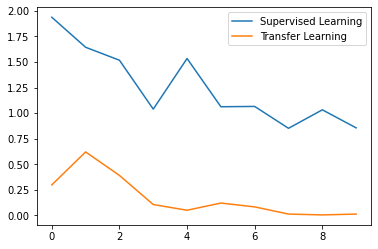

In [3]:
import matplotlib.pyplot as plt
epoch = range(0,10)
plt.plot(epoch, loss_values_SL, label = "Supervised Learning")
plt.plot(epoch, loss_values_TL, label = "Transfer Learning")
plt.legend()
plt.show()

## **4. Plotting Accuracy Graph:**

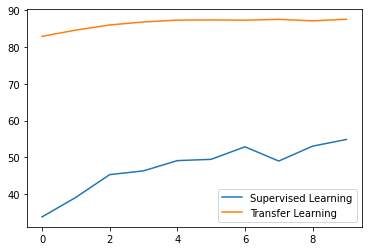

In [4]:
epoch = range(0,10)
plt.plot(epoch, accuracy_values_SL, label = "Supervised Learning")
plt.plot(epoch, accuracy_values_TL, label = "Transfer Learning")
plt.legend()
plt.show()